In [2]:
using Distributions
using StatsBase
using PythonPlot
using DataFrames
using Optim
using NLsolve
using Setfield
using CSV
using Turing
using LinearAlgebra
using ParameterHandling
include("simulations.jl")
include("estimators.jl")
include("models.jl")
include("rem_theory.jl")

FIG_PATH = "/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/Finite Lineages Plos Journal/paper/figures"

"/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/Finite Lineages Plos Journal/paper/figures"

In [55]:
# make dataframe from CSV file
DATA_PATH = "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/PUBLISHED/lineage_algorithm/code/data/YouData/MC4100_25C"
data = [CSV.read(DATA_PATH*"/"*f,DataFrame,header=string.(["cell","div","length","x","z"])) for f in readdir(DATA_PATH)]
data = vcat([hcat(data[i],DataFrame(:lineage=>i*ones(length(data[i][:,1])))) for i in eachindex(data)]...)
data = combine(groupby(data,:lineage),:div => cumsum => :n,names(data))

# now get the the cells
datac = combine(groupby(data,[:lineage,:n]),:length=>(x->x[1])=>:s0,:length=>(x->x[end])=>:sf,:n => (x -> 1.0*length(x))=>:gt)
# datac[:,:x] = log.(df_cells.M0 ./ mean(df_cells.M0))
# datac[:,:γ] = log.(df_cells.Mf ./ df_cells.M0)
# datac[:,:φ] = df_cells.gt .* df_cells.gt
datac

folder = "./output/data"
mkpath(folder)
CSV.write(folder*"/25C_celllist.csv",datac)


"./output/data/25C_celllist.csv"

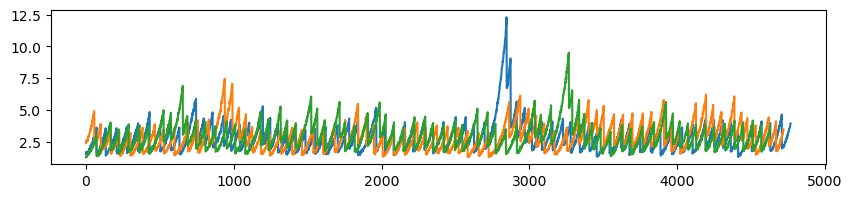

In [70]:
fig, ax = subplots(figsize=(10,2))
[ax.plot(d.length) for d in groupby(data,[:lineage])[1:3]]
fig